In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [65]:
train = pd.read_csv('train.csv')
train.head()

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,03/01/09,99.01,79.79,N.S.,76.19,84.02,70.07,81.66,57.83,68.94,51.67,70.74,53.88,65.55,46.75,69.700000
1,10/01/09,97.74,78.73,87.48,73.97,82.72,68.17,83.31,58.02,67.24,52.23,70.47,53.39,67.39,46.84,70.550000
2,17/01/09,95.95,71.01,87.66,71.01,80.58,67.16,82.25,57.49,69.64,52.48,71.66,53.18,69.51,48.04,69.830000
3,24/01/09,94.14,73.38,85.69,65.66,N.S.,65.57,80.87,54.59,N.S.,53.43,71.12,52.07,69.14,48.5,67.846667
4,31/01/09,91.45,70.39,N.S.,64.99,79.27,62.09,80.76,57.06,69.65,53.38,72.3,52.5,69.39,50.33,67.196923


In [66]:
train.shape

(544, 16)

In [67]:
train.isnull().sum()

WeekEnding_Date             0
Kolkata_Average_Price       0
Kolkata_Ref_Price           2
Bangalore_Average_Price     0
Bangalore_Ref_Price         2
Cochin_Average_Price        0
Cochin_Ref_Price            3
Darjeeling_Average_Price    0
Darjeeling_Ref_Price        2
Ernakulam_Average_Price     0
Ernakulam_Ref_Price         1
Siliguri_Average_Price      1
Siliguri_Ref_Price          1
Guwahati_Average_Price      0
Guwahati_Ref_Price          0
Average                     0
dtype: int64

In [68]:
train.duplicated().sum()

0

In [69]:
test = pd.read_csv('test.csv')
test.head()

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,15/06/19,NaN,165.87,154.08,160.82,NaN,NaN,116.45,112.82,91.82,NaN,102.30,NaN,83.07,65.34,NaN
1,22/06/19,171.35,173.12,NaN,NaN,NaN,NaN,NaN,NaN,90.68,76.34,NaN,NaN,81.34,NaN,NaN
2,29/06/19,NaN,NaN,156.14,NaN,NaN,150.39,NaN,NaN,NaN,NaN,96.84,NaN,NaN,NaN,NaN
3,06/07/19,NaN,NaN,158.04,NaN,NaN,146.68,111.24,111.47,NaN,NaN,97.87,NaN,NaN,NaN,NaN
4,13/07/19,NaN,NaN,157.55,163.85,NaN,144.87,NaN,111.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
test.shape

(29, 16)

In [71]:
test.isnull().sum()

WeekEnding_Date              0
Kolkata_Average_Price       20
Kolkata_Ref_Price           20
Bangalore_Average_Price     20
Bangalore_Ref_Price         20
Cochin_Average_Price        20
Cochin_Ref_Price            20
Darjeeling_Average_Price    20
Darjeeling_Ref_Price        20
Ernakulam_Average_Price     20
Ernakulam_Ref_Price         20
Siliguri_Average_Price      20
Siliguri_Ref_Price          20
Guwahati_Average_Price      20
Guwahati_Ref_Price          20
Average                     29
dtype: int64

In [72]:
train['Kolkata_Average_Price'].value_counts()

NS        20
N.S.      18
147.62     2
160.37     2
125.08     2
          ..
127.22     1
120.5      1
159.51     1
162.45     1
181.2      1
Name: Kolkata_Average_Price, Length: 487, dtype: int64

In [73]:
train[train['Kolkata_Average_Price'].str.contains('No Sale')]

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
10,14/03/09,No Sale,NaN,No Sale,NaN,No Sale,NaN,85.84,59.85,69.92,55.92,64.13,56.33,68.04,53.34,64.17125


In [74]:
a = [85.84,59.85,69.92,55.92,64.13,56.33,68.04,53.34]

In [75]:
np.mean(a)

64.17125

In [76]:
train[train['Kolkata_Average_Price'].str.contains('N.S')].head()

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
12,28/03/09,N.S.,64.79,74.71,N.S.,86.52,60.97,85.09,57.79,71.05,55.17,73.39,54.73,68.16,53.1,67.122500
14,11/04/09,N.S.,87.47,98.98,83.97,110.53,90.96,N.S.,58.6,78.37,54.25,80.77,54.83,73.77,53.55,77.170833
15,18/04/09,N.S.,94.81,N.S.,N. S.,115.41,91.14,89.55,58.68,82.96,54.24,83.53,55.14,76.47,53.48,77.764545
39,03/10/09,N.S,111.43,N.S,105.19,N.S,97.97,86.5,90.63,75.59,80.32,77.85,82.36,78.6,76.96,87.581818
54,16/01/10,N.S.,95.95,93.96,87.66,96.5,80.58,79.89,82.25,72.7,69.64,71.47,71.66,66.08,69.51,79.834615


In [77]:
b = [95.95, 93.96, 87.66, 96.5, 80.58, 79.89, 82.25, 72.7, 69.64, 71.47, 71.66, 66.08, 69.51]
np.mean(b)

79.83461538461539

In [78]:
c = [111.43, 105.19, 97.97, 86.5, 90.63, 75.59, 80.32, 77.85, 82.36, 78.6, 76.96]
np.mean(c)

87.58181818181819

In [79]:
train = train.fillna(0)

In [80]:
test = test.fillna(0)

In [81]:
train = train.replace('NS', 0)
train = train.replace('N.S.', 0)
train = train.replace('No Sale', 0)
train = train.replace('N.S', 0)
train = train.replace('N. S.', 0)
train = train.replace('No sale', 0)
train = train.replace('N.S.\xa0', 0)
train = train.replace('NS85.07', 0)

In [82]:
test = test.replace('NS', 0)
test = test.replace('N.S.', 0)
test = test.replace('No Sale', 0)
test = test.replace('N.S', 0)
test = test.replace('N. S.', 0)
test = test.replace('No sale', 0)
test = test.replace('N.S.\xa0', 0)
test = test.replace('NS85.07', 0)

In [83]:
train.isnull().sum()

WeekEnding_Date             0
Kolkata_Average_Price       0
Kolkata_Ref_Price           0
Bangalore_Average_Price     0
Bangalore_Ref_Price         0
Cochin_Average_Price        0
Cochin_Ref_Price            0
Darjeeling_Average_Price    0
Darjeeling_Ref_Price        0
Ernakulam_Average_Price     0
Ernakulam_Ref_Price         0
Siliguri_Average_Price      0
Siliguri_Ref_Price          0
Guwahati_Average_Price      0
Guwahati_Ref_Price          0
Average                     0
dtype: int64

In [84]:
test.isnull().sum()

WeekEnding_Date             0
Kolkata_Average_Price       0
Kolkata_Ref_Price           0
Bangalore_Average_Price     0
Bangalore_Ref_Price         0
Cochin_Average_Price        0
Cochin_Ref_Price            0
Darjeeling_Average_Price    0
Darjeeling_Ref_Price        0
Ernakulam_Average_Price     0
Ernakulam_Ref_Price         0
Siliguri_Average_Price      0
Siliguri_Ref_Price          0
Guwahati_Average_Price      0
Guwahati_Ref_Price          0
Average                     0
dtype: int64

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WeekEnding_Date           544 non-null    object 
 1   Kolkata_Average_Price     544 non-null    object 
 2   Kolkata_Ref_Price         544 non-null    object 
 3   Bangalore_Average_Price   544 non-null    object 
 4   Bangalore_Ref_Price       544 non-null    object 
 5   Cochin_Average_Price      544 non-null    object 
 6   Cochin_Ref_Price          544 non-null    object 
 7   Darjeeling_Average_Price  544 non-null    object 
 8   Darjeeling_Ref_Price      544 non-null    object 
 9   Ernakulam_Average_Price   544 non-null    object 
 10  Ernakulam_Ref_Price       544 non-null    object 
 11  Siliguri_Average_Price    544 non-null    object 
 12  Siliguri_Ref_Price        544 non-null    object 
 13  Guwahati_Average_Price    544 non-null    object 
 14  Guwahati_R

In [86]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WeekEnding_Date           29 non-null     object 
 1   Kolkata_Average_Price     29 non-null     float64
 2   Kolkata_Ref_Price         29 non-null     float64
 3   Bangalore_Average_Price   29 non-null     float64
 4   Bangalore_Ref_Price       29 non-null     float64
 5   Cochin_Average_Price      29 non-null     float64
 6   Cochin_Ref_Price          29 non-null     float64
 7   Darjeeling_Average_Price  29 non-null     float64
 8   Darjeeling_Ref_Price      29 non-null     float64
 9   Ernakulam_Average_Price   29 non-null     float64
 10  Ernakulam_Ref_Price       29 non-null     float64
 11  Siliguri_Average_Price    29 non-null     float64
 12  Siliguri_Ref_Price        29 non-null     object 
 13  Guwahati_Average_Price    29 non-null     float64
 14  Guwahati_Ref

In [87]:
test['Siliguri_Ref_Price'] = test['Siliguri_Ref_Price'].astype(float)

In [88]:
train.columns

Index(['WeekEnding_Date', 'Kolkata_Average_Price', 'Kolkata_Ref_Price',
       'Bangalore_Average_Price', 'Bangalore_Ref_Price',
       'Cochin_Average_Price', 'Cochin_Ref_Price', 'Darjeeling_Average_Price',
       'Darjeeling_Ref_Price', 'Ernakulam_Average_Price',
       'Ernakulam_Ref_Price', 'Siliguri_Average_Price', 'Siliguri_Ref_Price',
       'Guwahati_Average_Price', 'Guwahati_Ref_Price', 'Average'],
      dtype='object')

In [89]:
x = ['Kolkata_Average_Price', 'Kolkata_Ref_Price', 'Bangalore_Average_Price', 'Bangalore_Ref_Price', 'Cochin_Average_Price', 
     'Cochin_Ref_Price', 'Darjeeling_Average_Price', 'Darjeeling_Ref_Price', 'Ernakulam_Average_Price', 'Ernakulam_Ref_Price', 
     'Siliguri_Average_Price', 'Siliguri_Ref_Price', 'Guwahati_Average_Price', 'Guwahati_Ref_Price']
for i in x:
    train[i] = train[i].astype(float)

In [90]:
newtrain = train.drop('WeekEnding_Date', axis = 1)

In [94]:
newtest = test.drop(['WeekEnding_Date', 'Average'], axis = 1)

In [95]:
newtrain.shape

(544, 15)

In [96]:
newtest.shape

(29, 14)

In [97]:
x = newtrain.drop('Average', axis = 1)
y = newtrain['Average']

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [99]:
from sklearn.metrics import mean_squared_error

In [107]:
from sklearn.ensemble import GradientBoostingRegressor
gab = GradientBoostingRegressor()
y_pred = gab.fit(x_train, y_train).predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

2.502823172715539


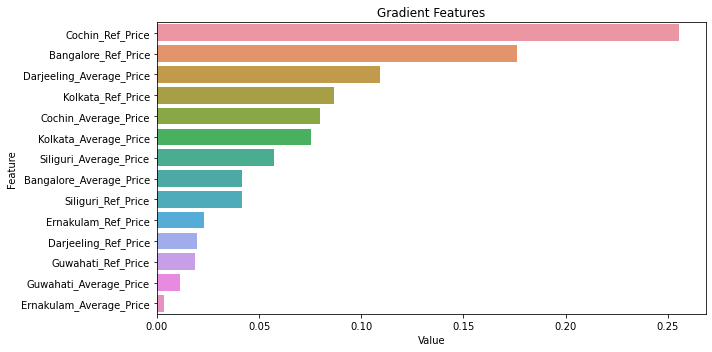

In [108]:
feature_imp = pd.DataFrame(sorted(zip(gab.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Gradient Features')
plt.tight_layout()
plt.show()

In [112]:
x_train = newtrain.drop('Average', axis = 1)
y_train = newtrain['Average']
x_test = newtest

In [113]:
from sklearn.ensemble import GradientBoostingRegressor
gab = GradientBoostingRegressor()
y_pred = gab.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'Average' : y_pred})
solution.to_csv('Gab.csv', index = False)

In [120]:
x_train = newtrain.drop(['Average', 'Darjeeling_Ref_Price', 'Ernakulam_Average_Price', 'Ernakulam_Ref_Price', 'Guwahati_Average_Price', 
                       'Guwahati_Ref_Price'], axis = 1)
y_train = newtrain['Average']
x_test = newtest.drop(['Darjeeling_Ref_Price', 'Ernakulam_Average_Price', 'Ernakulam_Ref_Price', 'Guwahati_Average_Price', 
                       'Guwahati_Ref_Price'], axis = 1)

In [121]:
from sklearn.ensemble import GradientBoostingRegressor
gab = GradientBoostingRegressor()
y_pred = gab.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'Average' : y_pred})
solution.to_csv('Gab12345.csv', index = False)

In [109]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
y_pred = xgb.fit(x_train, y_train).predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

2.6769666891937627


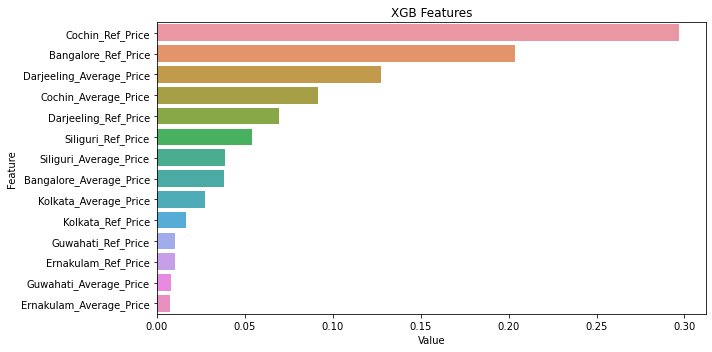

In [110]:
feature_imp = pd.DataFrame(sorted(zip(xgb.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('XGB Features')
plt.tight_layout()
plt.show()

In [114]:
x_train = newtrain.drop('Average', axis = 1)
y_train = newtrain['Average']
x_test = newtest

In [115]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
y_pred = xgb.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'Average' : y_pred})
solution.to_csv('Xgb.csv', index = False)

In [117]:
x_train = newtrain.drop(['Average', 'Ernakulam_Average_Price', 'Guwahati_Average_Price', 'Ernakulam_Ref_Price', 'Guwahati_Ref_Price'], axis = 1)
y_train = newtrain['Average']
x_test = newtest.drop(['Ernakulam_Average_Price', 'Guwahati_Average_Price', 'Ernakulam_Ref_Price', 'Guwahati_Ref_Price'], axis = 1)

In [118]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
y_pred = xgb.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'Average' : y_pred})
solution.to_csv('Xgb1234.csv', index = False)